In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [30]:
data = datasets.load_iris()

In [7]:
class LogisticRegression:
    def __init__(self, alpha=0.001, max_iter=5000):
        self.alpha = alpha
        self.max_iter = max_iter

    def fit(self, X_train, y_train):  # Обучение и тренировка модели
        m = y_train.size
        X = X_train.copy()
        X = np.insert(X, 0, 1, axis=1)
        t = X.T
        theta = np.zeros(X.shape[1])

        for n in range(self.max_iter):
            z = np.dot(theta, t)
            sigma = 1 / (1 + np.exp(-z))
            theta -= self.alpha * (1 / m) * np.dot((sigma - y_train), X)

        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

        return self.coef_, self.intercept_

    def predict(self, X_test):  # Возвращение прогнозов для новых данных
        pred = []
        for i in range(len(X_test)):
            z = self.intercept_ + np.sum(X_test[i] * self.coef_)
            sigma = 1 / (1 + np.exp(-z))

            if sigma >= 0.5:
                pred.append(1)
            else:
                pred.append(0)

        return pred

    def predict_proba(self, X_test):
        return [(1 / (1 + np.exp(-(self.intercept_ + np.sum(X_test[i] * self.coef_)))), 1 - 1 / (1 + np.exp(-(self.intercept_ + np.sum(X_test[i] * self.coef_))))) for i in range(len(X_test))]

In [16]:
iris = pd.DataFrame(data=data.data, columns=data.feature_names)

In [19]:
iris = iris.drop("petal length (cm)", axis=1)

In [20]:
iris = iris.drop("petal width (cm)", axis=1)

In [21]:
iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


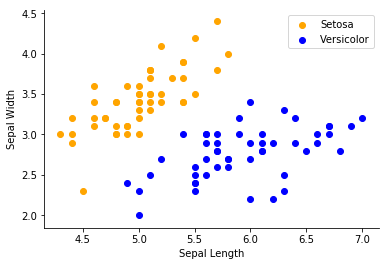

In [31]:
X = data.data[:100, :2]
y = data.target[:100]

setosa = plt.scatter(X[:50,0], X[:50,1], c='orange')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='blue')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train, y_train)

(array([ 0.52684561, -0.88058947]), -0.10475714558544347)

In [38]:
answers = model.predict(X_test)

In [44]:
answers

[1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

In [40]:
question = model.predict_proba(X_test)

In [45]:
question

[(0.6555104639663265, 0.3444895360336735),
 (0.4111619086476548, 0.5888380913523452),
 (0.4370751414985938, 0.5629248585014062),
 (0.3450993495277244, 0.6549006504722756),
 (0.6555104639663265, 0.3444895360336735),
 (0.4370751414985938, 0.5629248585014062),
 (0.6149071230467759, 0.38509287695322414),
 (0.659578123571558, 0.340421876428442),
 (0.3777395836779466, 0.6222604163220534),
 (0.3332914278204301, 0.6667085721795699),
 (0.623425910355245, 0.37657408964475503),
 (0.7334392262835069, 0.2665607737164931),
 (0.36526319590974843, 0.6347368040902516),
 (0.5463033585072292, 0.4536966414927708),
 (0.36091142273143617, 0.6390885772685638),
 (0.33312389564218164, 0.6668761043578184),
 (0.38984182004929796, 0.6101581799507021),
 (0.6636223999161007, 0.3363776000838993),
 (0.28790473047350207, 0.7120952695264979),
 (0.6230717999375369, 0.3769282000624631),
 (0.7665647459056655, 0.23343525409433452),
 (0.6831512943151677, 0.31684870568483225),
 (0.36108536289523396, 0.638914637104766),
 (0.6